In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

pov_file = "WB_Poverty_Data.csv"
life_ex_file = "Life_expectancy_data_Proj_1.csv"

pov_data_raw = pd.read_csv(pov_file)
life_ex_data = pd.read_csv(life_ex_file)

pov_data_raw.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Australia,AUS,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.5,NaN,0.5,NaN,0.5,NaN,NaN,NaN,NaN
1,Chile,CHL,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5,NaN,0.4,NaN,0.3,NaN,NaN,0.7,NaN,NaN
2,Hong Kong,HKG,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hungary,HUN,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2,0.7,0.6,1.3,0.6,0.2,0.3,NaN,NaN,NaN
4,United States,USA,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.2,1.2,1.0,1.2,1.0,1.0,NaN,NaN,NaN


In [2]:
pov_data_filtered = pov_data_raw[["Country Name", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]]
pov_data_filtered.set_index("Country Name", inplace=True)
pov_data_T = pov_data_filtered.T
pov_data_clean = pov_data_T.fillna(0)
pov_data_clean["Australia"] = pd.to_numeric(pov_data_clean["Australia"])
pov_data_clean["Chile"] = pd.to_numeric(pov_data_clean["Chile"])
pov_data_clean["Hong Kong"] = pd.to_numeric(pov_data_clean["Hong Kong"])
pov_data_clean["Hungary"] = pd.to_numeric(pov_data_clean["Hungary"])
pov_data_clean["United States"] = pd.to_numeric(pov_data_clean["United States"])

pov_data_final = pov_data_clean[["Australia", "Chile", "Hungary", "United States"]]

pov_data_final

Country Name,Australia,Chile,Hungary,United States
2008,0.4,0.0,0.0,1.0
2009,0.0,1.7,0.1,1.0
2010,0.3,0.0,0.1,1.0
2011,0.0,0.9,0.1,1.0
2012,0.0,0.0,0.3,1.0
2013,0.0,0.5,0.2,1.0
2014,0.5,0.0,0.7,1.2
2015,0.0,0.4,0.6,1.2
2016,0.5,0.0,1.3,1.0
2017,0.0,0.3,0.6,1.2


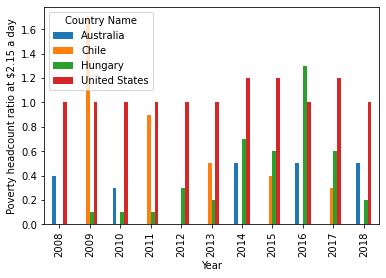

In [3]:

poverty_bar_plot = pov_data_final.plot.bar()
plt.xlabel("Year")
plt.ylabel("Poverty headcount ratio at $2.15 a day")
poverty_bar_plot
plt.savefig("Poverty_Bar_Graph.png")
